In [2]:
#Packages
%pylab
%matplotlib inline
import numpy as np
from scipy import stats
import scipy.ndimage
import matplotlib.pyplot as plt
from images_segmentation import otsu as ot

Using matplotlib backend: <object object at 0x0000016618A6E490>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [8]:
# loading some images
img_1 = imread(r"data\Otsu_data\NIH3T3\img\dna-0.png") 
img_2 = imread(r"data\Otsu_data\N2DH-GOWT1\img\t39.tif")
img_3 = imread(r"data\Otsu_data\N2DL-HeLa\img\t13.tif") 

In [3]:
# otsu thresholding
def otsu_thresholding(img,x):
    import matplotlib.pyplot
    import numpy
#bins optimieren.... alles zu 0-255 machen


   # load histogram, Mathematische werte aus Histogramm rausgreifen
    n, bins, patches = matplotlib.pyplot.hist(img.flatten(),log = 'False',bins = x)

   # initialize threshold value (T = 0) 
    thres = 0
    copy = img.copy()

    # create list to store values of within class variance for each threshold value
    bcv = list()
    
    # set up initial values
    for i in range(0,len(n)):
        bclv = 0
        w0_sum = 0
        mean_sum0 = 0
        v0_sum = 0
        mean_sum1 = 0
        v1_sum = 0
        w0 = 0
        w1 = 0
        w1_sum = 0

        #sum up the probabilites of each intensity value;  and the mean value (sind noch nicht happy mit der definition :()
        for j in range(0,i+1):
            w0_sum += n[j]
            mean_sum0 += bins[j]*n[j]
            
        # background class probabilites and class mean levels
        w0 = w0_sum / sum(n)  
        if(sum(n[0:i+1]) != 0):  
             mean_0 = mean_sum0 / sum(n[0:i+1])
        else: mean_0 = 0
        
        # compute background class variance
        for m in range(0,i+1):
            v0_sum += ((bins[m]-mean_0)** 2) * n[m]
        
        v0 = v0_sum / sum(n[0:i+1])
        
        # sum up the probabilites of each intensity value;  and the mean value
        for k in range(i+1, len(n)): 
            w1_sum += n[k]
          
            mean_sum1 += bins[k]*n[k]

        # compute foreground class probabilities and class mean levels    
        w1 = w1_sum / sum(n)
     
        if(sum(n[i+1:len(n)]) != 0):
            mean_1 = mean_sum1 / sum(n[i+1:len(n)])
        else: mean_1 = 0
        # compute foreground class variance 
        for s in range(i+1,len(n)):
            v1_sum += ((bins[s]-mean_1) ** 2) * n[s]
        if( sum(n[i+1:len(n)]) != 0):
            v1 = v1_sum / sum(n[i+1:len(n)])
        else: v1 = 0

        # compute within class variance and append to list
        bclv = (w0 * v0) + (w1 * v1)
        bcv.append(bclv)

    # select optimal threshold value, minimum value of within class variance
    optimal_thres = min(bcv)

    #select optimal threshold in the list
    l = 0
    while l < len(bcv):
        if bcv[l] == optimal_thres: thres = bins[l]
        l += 1

    #perform image clipping with 0 and 1 values!!!
    for o in numpy.ndindex(copy.shape):
        if copy[o] < (thres): 
            copy[o] = 0
        else:
            copy[o] = 1


    return copy 


In [36]:
#function to define a set window in a picture
#define function for image, p[x,y] as top left pixel and p[w,z] as end pixels
def crop(image,x,y,w,z):
    h = w-x
    w = z-y
    cropped = np.zeros([h,w])
    #for a,b in np.ndindex((x:w), (y:z)):
    for a in range(x,w):
        for b in range(y,z):
            cropped[a-x,b-y]=image[a,b]
    return cropped

def crop1(image, xmin, ymin, xmax, ymax):
    cropped=np.empty([xmax-xmin, ymax-ymin], dtype=float)
    for a,b in np.ndindex(xmax-xmin, ymax-ymin):
        cropped[a,b]=image[a+xmin,b+ymin]
    return cropped

[[0.14509805 0.15294118 0.14901961 ... 0.07843138 0.07843138 0.07450981]
 [0.16078432 0.14901961 0.14901961 ... 0.07843138 0.08235294 0.08235294]
 [0.14901961 0.14901961 0.15686275 ... 0.08235294 0.08235294 0.07843138]
 ...
 [0.08627451 0.08235294 0.08627451 ... 0.09411765 0.09019608 0.09019608]
 [0.08627451 0.09019608 0.08627451 ... 0.09411765 0.09019608 0.09411765]
 [0.08627451 0.08235294 0.08627451 ... 0.09411765 0.09411765 0.09019608]]
[[0.14509805 0.15294118 0.14901961 ... 0.08627451 0.08235294 0.08235294]
 [0.16078432 0.14901961 0.14901961 ... 0.08235294 0.08235294 0.08235294]
 [0.14901961 0.14901961 0.15686275 ... 0.08235294 0.07843138 0.08235294]
 ...
 [0.07843138 0.08235294 0.08235294 ... 0.08235294 0.08235294 0.08235294]
 [0.08235294 0.08235294 0.08235294 ... 0.08235294 0.08235294 0.07843138]
 [0.08235294 0.08235294 0.08235294 ... 0.08235294 0.08627451 0.08235294]]


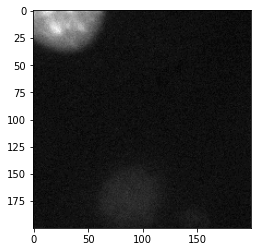

In [45]:

print(img_1)
print(crop(img_1, 0,0,100,100))
figure()
cropped=crop(img_1,0,0,200,200)
imshow(cropped,'gray')